# Aggregation in Arrays
- When We have big data, we find summary statistics, to summarize data.
- Mean and SD are most common, other include sum, product, min, max etc.
- Numpy has these fast built-in aggregation functions for arrays.
- If we are working with numpy arrays then we should look for using numpy's version of aggregates only.

# Summing the values in an Array 
- Values of sum() in pyhton and np.sum() in numpy are mpre or less same.
- But they are not same, np.sum() has other attributes and can be used with multidimensional arrays too.

In [19]:
import numpy as np
np.random.seed(0)

L = np.random.random(100000000)
L

array([0.5488135 , 0.71518937, 0.60276338, ..., 0.08870192, 0.45256207,
       0.17769845])

In [20]:
assert int(sum(L)) == int(np.sum(L)) # Same as python

In [21]:
# Difference is in computation time
%timeit sum(L)

3.44 s ± 30 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%timeit np.sum(L)

14.5 ms ± 830 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Minimum and Maximum



In [25]:
min(L), max(L)

(np.float64(1.0361921209955938e-08), np.float64(0.9999999925787235))

In [27]:
np.min(L), np.max(L)  # Same syntax but quick

(np.float64(1.0361921209955938e-08), np.float64(0.9999999925787235))

You can compare speeds.

# Multidimensional Aggregates

- By default in multidimensional arrays also, numpy works on all elements together.
- We can specify the axis to collapse
  - e.g. to get sum of each column, collapse rows, i.e. collapse axis=0.
  - to get sum of each row, collapse columns, i.e. collapse axis=1.

In [36]:
np.random.seed(0)
x = np.random.randint(15, size=[5,3])
x

array([[12,  5,  0],
       [ 3, 11,  3],
       [ 7,  9,  3],
       [ 5,  2,  4],
       [ 7,  6,  8]])

In [37]:
# Aggregation on complete array
np.sum(x)

np.int64(85)

In [38]:
# Aggregation on columns
np.sum(x, axis=0)

array([34, 33, 18])

In [39]:
# Aggregation on rows
np.sum(x, axis=1)


array([17, 17, 19, 11, 21])

# Aggreagation with NaN values
- If we use normal aggregation funcs like, np.mean, np.min etc it will not ignore NaN, instead return NaN as output.
- For Ignoring NaN values we must use other aggregation functions - put nan before each aggregator name.
``` python 
np.sum() -> np.nansum()
np.min() -> np.nanmin()   etc.

```


In [42]:
# Example array with NaN values
x = np.array([[1, 2, np.nan, 4], [np.nan, 4, 5, 1]])
x

array([[ 1.,  2., nan,  4.],
       [nan,  4.,  5.,  1.]])

In [43]:
# Sum with NaN results in NaN
print(np.sum(x))         # Output: nan
print(np.nansum(x))      # Output: 7.0

nan
17.0


- List of useful aggregation functions and their nan-safe counterparts.


| Function Name   | NaN-safe Version   | Description                             |
|-----------------|--------------------|-----------------------------------------|
| `np.sum`        | `np.nansum`        | Compute sum of elements                 |
| `np.prod`       | `np.nanprod`       | Compute product of elements             |
| `np.mean`       | `np.nanmean`       | Compute mean of elements                |
| `np.std`        | `np.nanstd`        | Compute standard deviation              |
| `np.var`        | `np.nanvar`        | Compute variance                        |
| `np.min`        | `np.nanmin`        | Find minimum value                      |
| `np.max`        | `np.nanmax`        | Find maximum value                      |
| `np.argmin`     | `np.nanargmin`     | Find index of minimum value             |
| `np.argmax`     | `np.nanargmax`     | Find index of maximum value             |
| `np.median`     | `np.nanmedian`     | Compute median of elements              |
| `np.percentile` | `np.nanpercentile` | Compute rank-based statistics of elements |
| `np.any`        | N/A                | Evaluate whether any elements are true  |
| `np.all`        | N/A                | Evaluate whether all elements are true  |


# Example: What Is the Average Height of US Presidents?

In [47]:
import pandas as pd 

data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
heights

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 168, 170, 178, 182, 180,
       183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188,
       188, 182, 185, 191, 182])

In [57]:
# Summary statstics calculation
print(f"{heights.mean()=}")
print(f"{heights.min()=}")
print(f"{heights.max()=}")
print(f"{heights.std()=}")

heights.mean()=np.float64(180.04545454545453)
heights.min()=np.int64(163)
heights.max()=np.int64(193)
heights.std()=np.float64(6.983599441335736)


In [64]:
# Find quantiles
print(f"{np.percentile(heights, 25)=}")  # 1st quantile
print(f"{np.median(heights)=}")            # 2nd quantile
print(f"{np.percentile(heights, 75)=}")  # 3rd quantile

np.percentile(heights, 25)=np.float64(174.75)
np.median(heights)=np.float64(182.0)
np.percentile(heights, 75)=np.float64(183.5)


Text(0.5, 1.0, 'Height Distribution of US Presidents')

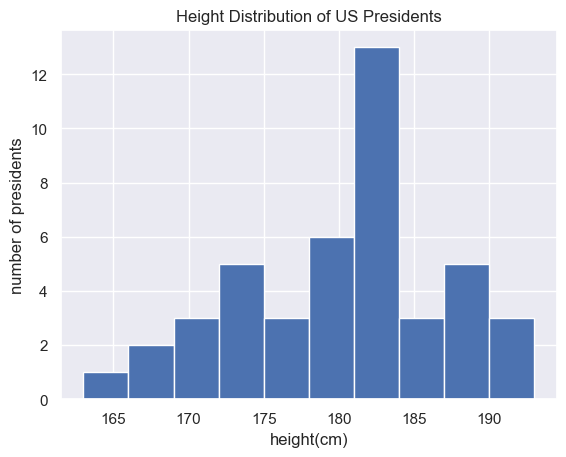

In [74]:
# Visual representation
import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme() # set plot style

plt.hist(heights)
plt.xlabel('height(cm)')
plt.ylabel('number of presidents')
plt.title('Height Distribution of US Presidents')